Vishal Kumar
226101005

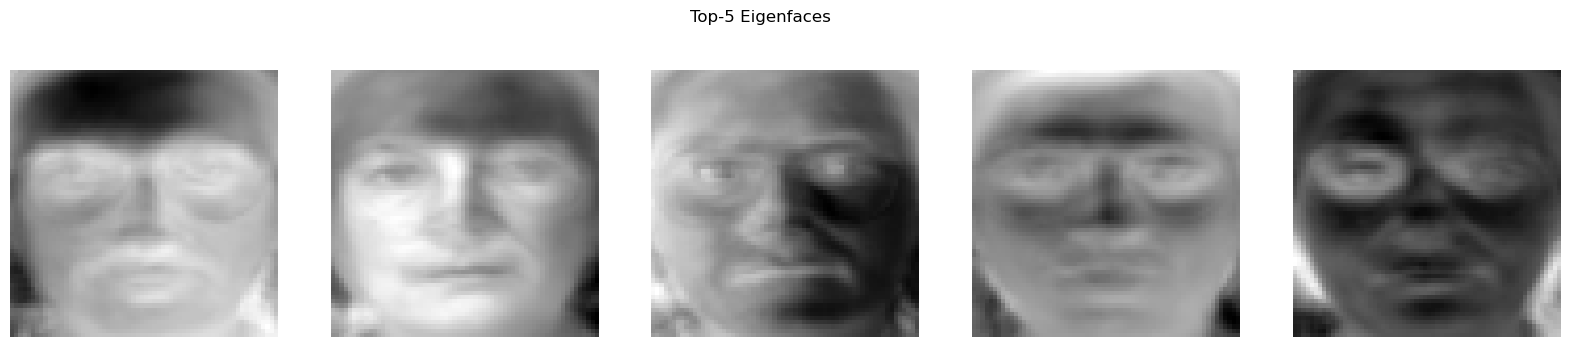

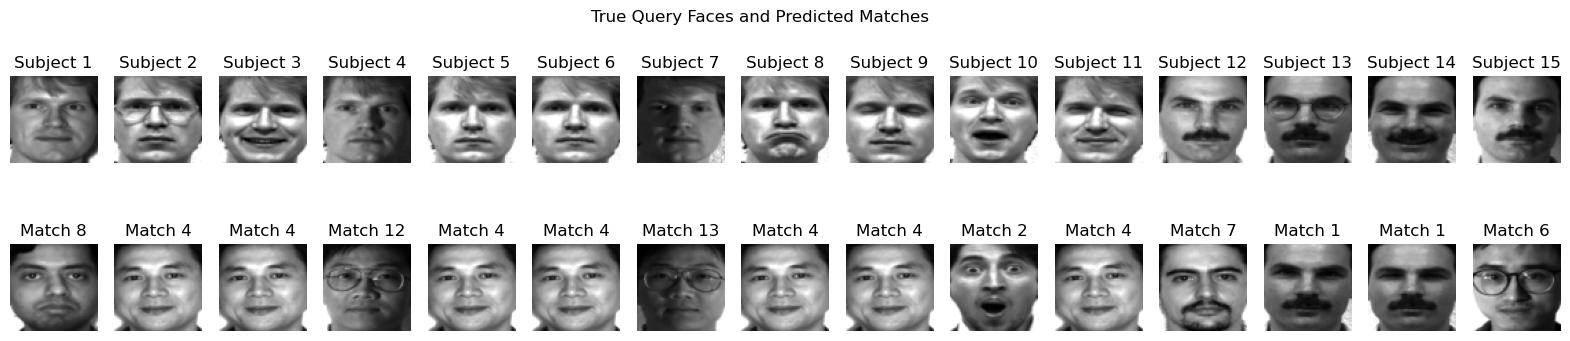

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
from sklearn.decomposition import PCA

# Load the face images
face_images = imread_collection('/home/vishal/faces/*.jpg')
num_images = len(face_images)

# Resize the images to a common size and flatten them into 1D vectors
image_shape = (64, 64)
face_vectors = np.zeros((num_images, np.prod(image_shape)))
for i, image in enumerate(face_images):
    image_resized = resize(image, image_shape, anti_aliasing=True)
    face_vectors[i, :] = image_resized.flatten()

# Split the data into training and testing sets
test_indices = np.arange(0, 15)  # One face per subject for testing
train_indices = np.delete(np.arange(num_images), test_indices)
train_data = face_vectors[train_indices, :]
test_data = face_vectors[test_indices, :]

# Compute the mean face of the training data
mean_face = np.mean(train_data, axis=0)

# Compute the covariance matrix of the training data and perform eigendecomposition to obtain the eigenfaces
pca = PCA()
pca.fit(train_data - mean_face)
eigenfaces = pca.components_

# Visualize the top-K eigenfaces
K = 5
eigenface_images = np.zeros((K, image_shape[0], image_shape[1]))
for i in range(K):
    eigenface_image = eigenfaces[i, :].reshape(image_shape)
    eigenface_images[i, :, :] = eigenface_image
plt.figure(figsize=(20, 4))
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.imshow(eigenface_images[i, :, :], cmap='gray')
    plt.axis('off')
plt.suptitle('Top-{} Eigenfaces'.format(K))
plt.show()

# Project the training and testing data onto the top-K eigenfaces to obtain the transformed data
train_transformed = pca.transform(train_data - mean_face)[:, :K]
test_transformed = pca.transform(test_data - mean_face)[:, :K]

# Calculate the Euclidean distance between each test sample and all the training samples in the transformed K-dimensional space
distances = np.sum((test_transformed[:, np.newaxis, :] - train_transformed[np.newaxis, :, :]) ** 2, axis=2)

# Find the best match for each test sample based on the Euclidean distance criterion
best_matches = np.argmin(distances, axis=1)

# Display both the true query face and the predicted face for each test sample
plt.figure(figsize=(20, 4))
for i in range(15):
    # Display the true query face
    plt.subplot(2, 15, i+1)
    plt.imshow(face_vectors[test_indices[i], :].reshape(image_shape), cmap='gray')
    plt.title('Subject {}'.format(i+1))
    plt.axis('off')
    
    # Display the predicted face
    plt.subplot(2, 15, 15+i+1)
    plt.imshow(face_vectors[train_indices[best_matches[i]], :].reshape(image_shape), cmap='gray')
    plt.title('Match {}'.format(best_matches[i]//11+1))
    plt.axis('off')
plt.suptitle('True Query Faces and Predicted Matches')
plt.show()


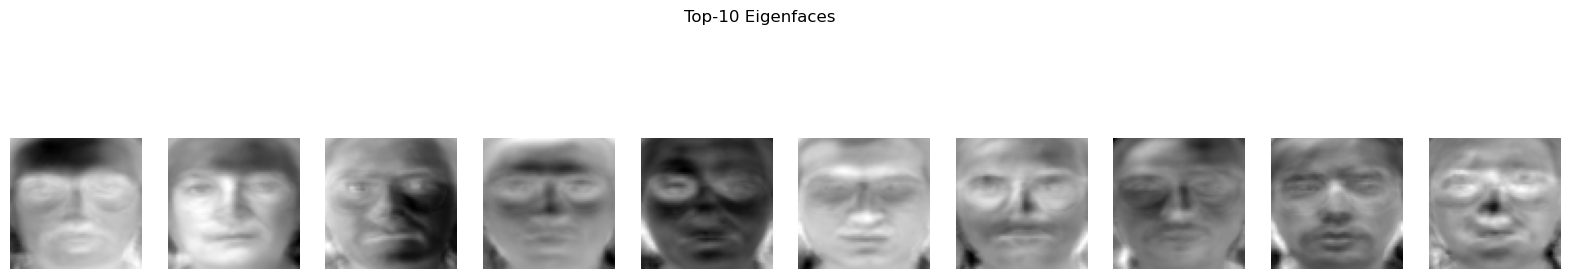

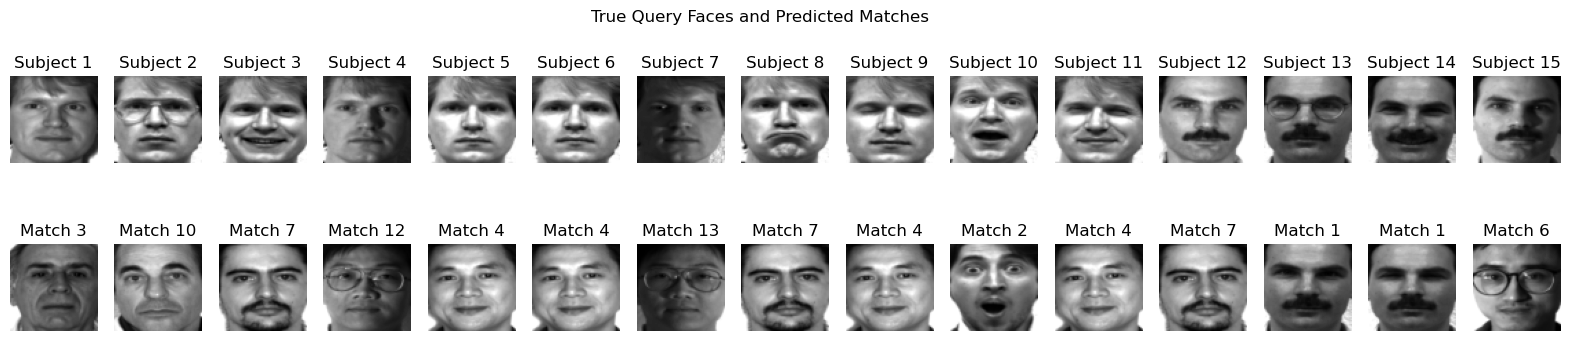

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
from sklearn.decomposition import PCA

# Load the face images
face_images = imread_collection('/home/vishal/faces/*.jpg')
num_images = len(face_images)

# Resize the images to a common size and flatten them into 1D vectors
image_shape = (64, 64)
face_vectors = np.zeros((num_images, np.prod(image_shape)))
for i, image in enumerate(face_images):
    image_resized = resize(image, image_shape, anti_aliasing=True)
    face_vectors[i, :] = image_resized.flatten()

# Split the data into training and testing sets
test_indices = np.arange(0, 15)  # One face per subject for testing
train_indices = np.delete(np.arange(num_images), test_indices)
train_data = face_vectors[train_indices, :]
test_data = face_vectors[test_indices, :]

# Compute the mean face of the training data
mean_face = np.mean(train_data, axis=0)

# Compute the covariance matrix of the training data and perform eigendecomposition to obtain the eigenfaces
pca = PCA()
pca.fit(train_data - mean_face)
eigenfaces = pca.components_

# Visualize the top-K eigenfaces
K = 10
eigenface_images = np.zeros((K, image_shape[0], image_shape[1]))
for i in range(K):
    eigenface_image = eigenfaces[i, :].reshape(image_shape)
    eigenface_images[i, :, :] = eigenface_image
plt.figure(figsize=(20, 4))
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.imshow(eigenface_images[i, :, :], cmap='gray')
    plt.axis('off')
plt.suptitle('Top-{} Eigenfaces'.format(K))
plt.show()

# Project the training and testing data onto the top-K eigenfaces to obtain the transformed data
train_transformed = pca.transform(train_data - mean_face)[:, :K]
test_transformed = pca.transform(test_data - mean_face)[:, :K]

# Calculate the Euclidean distance between each test sample and all the training samples in the transformed K-dimensional space
distances = np.sum((test_transformed[:, np.newaxis, :] - train_transformed[np.newaxis, :, :]) ** 2, axis=2)

# Find the best match for each test sample based on the Euclidean distance criterion
best_matches = np.argmin(distances, axis=1)

# Display both the true query face and the predicted face for each test sample
plt.figure(figsize=(20, 4))
for i in range(15):
    # Display the true query face
    plt.subplot(2, 15, i+1)
    plt.imshow(face_vectors[test_indices[i], :].reshape(image_shape), cmap='gray')
    plt.title('Subject {}'.format(i+1))
    plt.axis('off')
    
    # Display the predicted face
    plt.subplot(2, 15, 15+i+1)
    plt.imshow(face_vectors[train_indices[best_matches[i]], :].reshape(image_shape), cmap='gray')
    plt.title('Match {}'.format(best_matches[i]//11+1))
    plt.axis('off')
plt.suptitle('True Query Faces and Predicted Matches')
plt.show()


In [1]:
import numpy as np

n = 1000
d = 20
r = 1
# Randomly taking the centers of the d-dimention hyper-spheres
C1 = np.random.uniform(-1, 1, d)
C2 = np.random.uniform(-1, 1, d)

# Generate n points in the hyper-spheres
S1 = np.random.normal(size=(n, d)) * r + C1
S2 = np.random.normal(size=(n, d)) * r + C2

# (a).
# Compute the centroids of both arrays
m1 = np.mean(S1, axis=0)
m2 = np.mean(S2, axis=0)

#  Compute the covariance matrices of both arrays
C1 = np.cov(S1.T)
C2 = np.cov(S2.T)

In [2]:
# Compute the optimal direction vector w for LDA
Sw = C1 + C2
w = np.dot( np.linalg.inv(Sw) , (m2 - m1))
w /= np.linalg.norm(w)

In [3]:
# Project the vector data in arrays S1 and S2
zS1 = np.dot( S1 , w)
zS2 = np.dot(S2 , w)


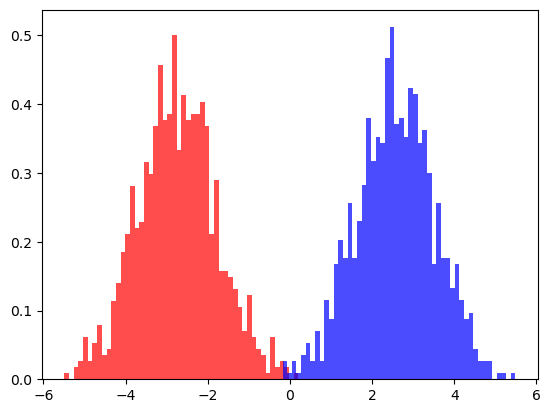

In [16]:
import matplotlib.pyplot as plt

# Plot the normalized histograms of zS1 and zS2
plt.hist(zS1, bins=50, density=True, alpha=0.7, color='red')
plt.hist(zS2, bins=50, density=True, alpha=0.7, color='blue')
plt.show()



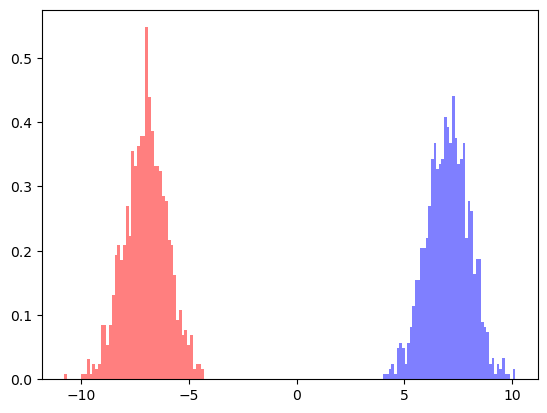

In [13]:

r = 1
C1 = np.random.uniform(-2, -1, d)
C2 = np.random.uniform(1, 2, d)

S1 = np.random.normal(size=(n, d)) * r + C1
S2 = np.random.normal(size=(n, d)) * r + C2

m1 = np.mean(S1, axis=0)
m2 = np.mean(S2, axis=0)

C1 = np.cov(S1.T)
C2 = np.cov(S2.T)

Sw = C1 + C2
w = np.dot( np.linalg.inv(Sw) , (m2 - m1))
w /= np.linalg.norm(w)

zS1 = np.dot(S1 , w)
zS2 = np.dot(S2 , w)

plt.hist(zS1, bins=50, density=True, alpha=0.5, color='red')
plt.hist(zS2, bins=50, density=True, alpha=0.5, color='blue')
plt.show()

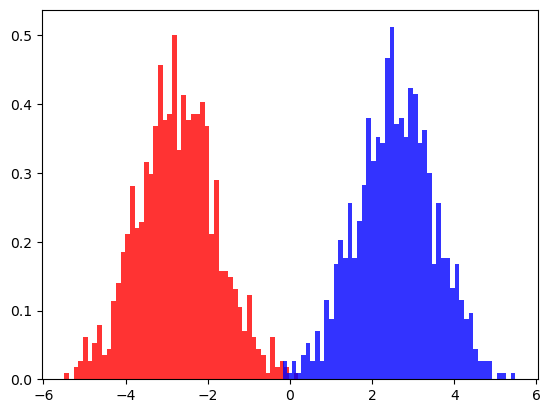

In [15]:
r = 1
eps = 0.1
C1 = np.random.uniform(-1, -eps, d)
C2 = np.random.uniform(eps, 1, d)

S1 = np.random.normal(size=(n, d)) * r + C1
S2 = np.random.normal(size=(n, d)) * r + C2

m1 = np.mean(S1, axis=0)
m2 = np.mean(S2, axis=0)

C1 = np.cov(S1.T)
C2 = np.cov(S2.T)

Sw = C1 + C2
w = np.dot( np.linalg.inv(Sw) , (m2 - m1))
w /= np.linalg.norm(w)

zS1 = np.dot(S1 , w)
zS2 = np.dot(S2 , w)

plt.hist(zS1, bins=50, density=True, alpha=0.8, color='red')
plt.hist(zS2, bins=50, density=True, alpha=0.8, color='blue')
plt.show()


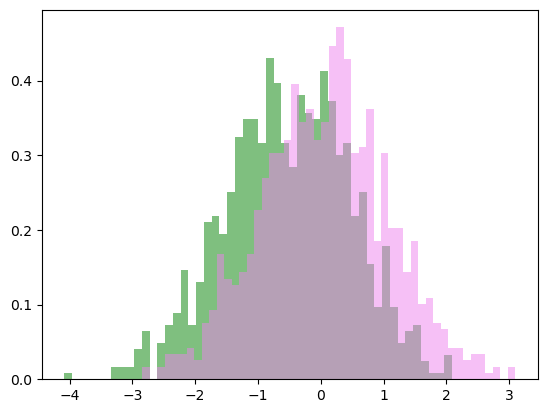

In [9]:
r = 1
C1 = np.random.uniform(-0.5, 0.5, d)
C2 = np.random.uniform(-0.5, 0.5, d)
C2 += (C1 - C2) * (r / np.linalg.norm(C1 - C2))

S1 = np.random.normal(size=(n, d)) * r + C1
S2 = np.random.normal(size=(n, d)) * r + C2

m1 = np.mean(S1, axis=0)
m2 = np.mean(S2, axis=0)

C1 = np.cov(S1.T)
C2 = np.cov(S2.T)

Sw = C1 + C2
w = np.dot( np.linalg.inv(Sw) , (m2 - m1))
w /= np.linalg.norm(w)

zS1 = np.dot(S1 , w)
zS2 = np.dot(S2 , w)

plt.hist(zS1, bins=50, density=True, alpha=0.5, color='green')
plt.hist(zS2, bins=50, density=True, alpha=0.5, color='violet')
plt.show()


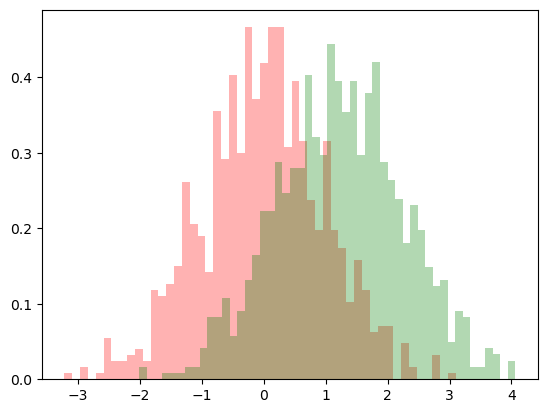

In [17]:
r = 1
C1 = np.random.uniform(-0.5, 0.5, d)
C2 = C1 + (np.random.normal(size=d) * r / 4)

S1 = np.random.normal(size=(n, d)) * r + C1
S2 = np.random.normal(size=(n, d)) * r + C2

m1 = np.mean(S1, axis=0)
m2 = np.mean(S2, axis=0)

C1 = np.cov(S1.T)
C2 = np.cov(S2.T)

Sw = C1 + C2
w = np.dot( np.linalg.inv(Sw) , (m2 - m1))
w /= np.linalg.norm(w)

zS1 = np.dot(S1 , w)
zS2 = np.dot(S2 , w)

plt.hist(zS1, bins=50, density=True, alpha=0.3, color='red')
plt.hist(zS2, bins=50, density=True, alpha=0.3, color='green')
plt.show()
